## Notebook setup

In [9]:
import os
import io
import warnings
import datetime
import numpy as np
import base64
import pytz
import pandas as pd
import matplotlib

import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline

from IPython.display import HTML

# import sys
# sys.path.append('../../')

from openbb_terminal.reports import widget_helpers as widgets
from openbb_terminal.sdk import openbb
from openbb_terminal.sdk import helper
from openbb_terminal.helper_classes import TerminalStyle
from openbb_terminal.core.config.paths import REPOSITORY_DIRECTORY

%matplotlib inline
matplotlib_inline.backend_inline.set_matplotlib_formats("svg")
warnings.filterwarnings("ignore")

# Detect if prediction capabilities are present. If they are not, disable prediction in the rest of the script
# so that the report can still be generated without prediction results.
# predictions = True
# try:
#     openbb.stocks.pred.models
# except Exception as e:
#     predictions = False

# TODO Fix predictions virtual path on api refactored

predictions = False

### Header

In [10]:
theme = TerminalStyle("light", "light", "light")
stylesheet = widgets.html_report_stylesheet()
user_time_zone = pytz.timezone(helper.get_user_timezone())

In [11]:
# Parameters that will be replaced when calling this notebook
# Do not leave parameters blank as notebook will not run otherwise
transactions = "Public_Equity_Orderbook.xlsx"
report_name = "Portfolio Report"

In [12]:
holdings = (
    str(REPOSITORY_DIRECTORY)
    + "/openbb_terminal/miscellaneous/portfolio_examples/holdings/"
)
transactions_path = holdings + transactions
_, transactions_file = os.path.split(transactions_path)
report_title = f"Portfolio report for {transactions_file}"
report_date = pd.Timestamp.now(tz=user_time_zone).strftime("%d %B, %Y")
report_time = pd.Timestamp.now(tz=user_time_zone).strftime("%H:%M")
report_timezone = pd.Timestamp.now(tz=user_time_zone).tzinfo
report_title, report_date, report_time, report_timezone

('Portfolio report for Public_Equity_Orderbook.xlsx',
 '12 November, 2022',
 '17:09',
 <DstTzInfo 'America/New_York' EST-1 day, 19:00:00 STD>)

## Data

Loading

In [13]:
try:
    P = openbb.portfolio.load(transactions_path)
    openbb.portfolio.show(P)
    # transactions = Portfolio.read_transactions(transactions_path)
    # P = Portfolio(transactions)
    # P.generate_portfolio_data()
    # P.set_benchmark()
    # P.get_transactions()
except ValueError:
    raise ValueError(
        "Failed to load the transactions. Is this file inside the 'holdings' folder?"
    )

         Loading benchmark: 100%|██████████| 4/4 [00:04<00:00,  1.21s/it]


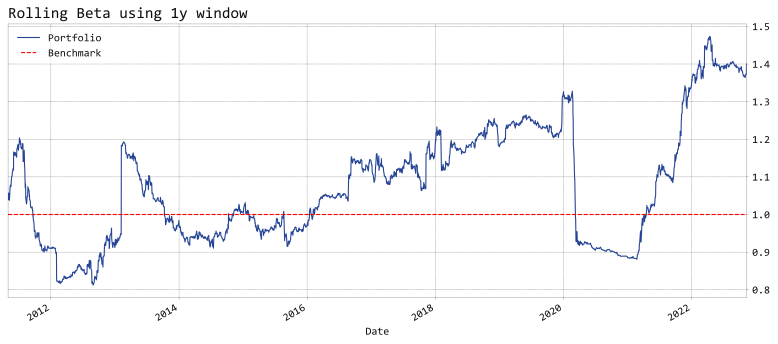

In [14]:
fig, ax = plt.subplots(figsize=(11, 5), dpi=150)
openbb.portfolio.rbeta(P, chart=True, external_axes=[ax])

fig.tight_layout()
f = io.BytesIO()
fig.savefig(f, format="svg")
beta_chart = f.getvalue().decode("utf-8")

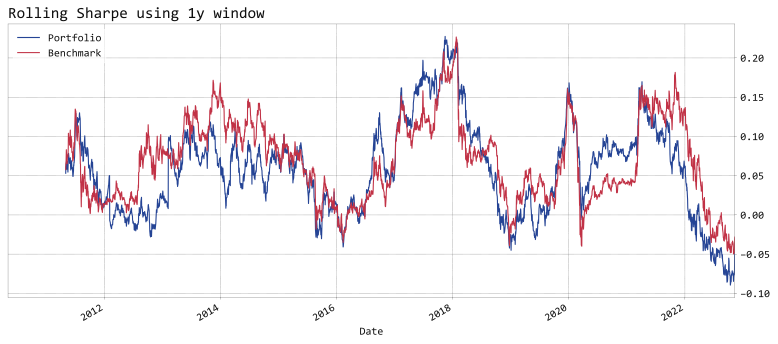

In [15]:
fig, ax = plt.subplots(figsize=(11, 5), dpi=150)
openbb.portfolio.rsharpe(P, chart=True, external_axes=[ax])

fig.tight_layout()
f = io.BytesIO()
fig.savefig(f, format="svg")
sharpe_chart = f.getvalue().decode("utf-8")

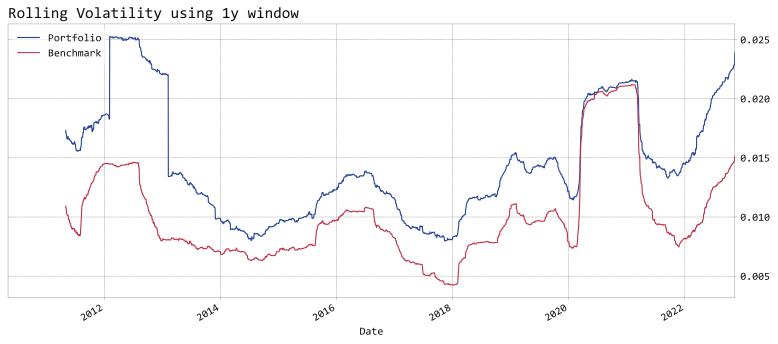

In [16]:
fig, ax = plt.subplots(figsize=(11, 5), dpi=150)
openbb.portfolio.rvol(P, chart=True, external_axes=[ax])

fig.tight_layout()
f = io.BytesIO()
fig.savefig(f, format="svg")
volatility_chart = f.getvalue().decode("utf-8")

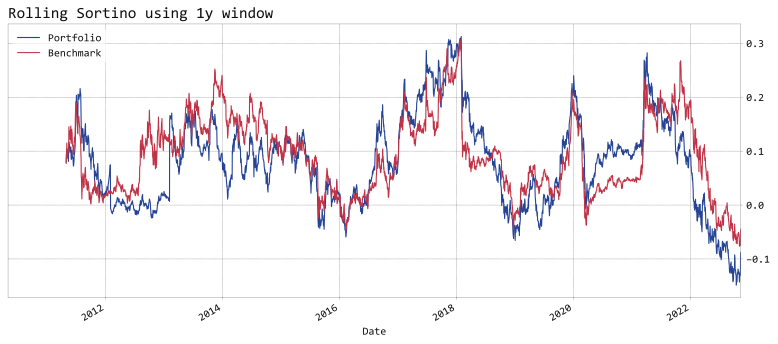

In [17]:
fig, ax = plt.subplots(figsize=(11, 5), dpi=150)
openbb.portfolio.rsort(P, chart=True, external_axes=[ax])

fig.tight_layout()
f = io.BytesIO()
fig.savefig(f, format="svg")
sortino_chart = f.getvalue().decode("utf-8")

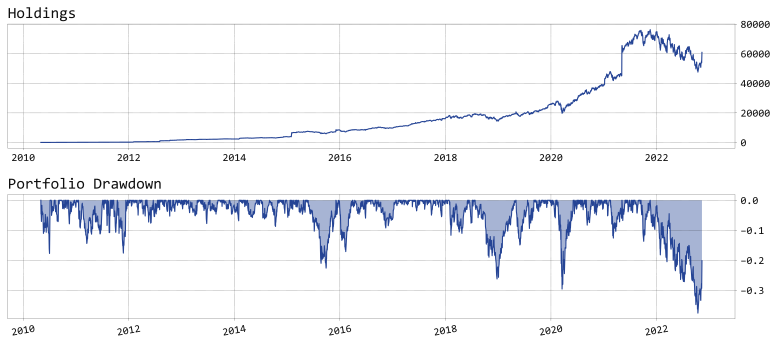

In [18]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(11, 5), dpi=150)
openbb.portfolio.maxdd(P, chart=True, external_axes=ax)

fig.tight_layout()
f = io.BytesIO()
fig.savefig(f, format="svg")
maxdd_chart = f.getvalue().decode("utf-8")

In [19]:
P.calculate_allocations("country")

country_allocation = pd.DataFrame(
    [P.portfolio_country_allocation, P.benchmark_country_allocation]
).T
country_allocation.columns = ["Portfolio", "Benchmark"]
country_allocation.fillna("-", inplace=True)
country_allocation["Portfolio"] = (country_allocation["Portfolio"] * 100).map(
    "{:.3}%".format
)
country_allocation["Benchmark"] = (country_allocation["Benchmark"] * 100).map(
    "{:.3}%".format
)

country_allocation

Loading country/region data: 100%|██████████| 3/3 [00:00<00:00, 362.76it/s]

,Portfolio,Benchmark
Netherlands,42.6%,0.12%
United States,32.3%,99.0%
Taiwan,12.5%,---%
China,7.55%,---%
Germany,5.05%,---%
United Kingdom,---%,0.53%
Switzerland,---%,0.37%
Singapore,---%,0.03%


In [20]:
P.calculate_allocations("sector")

sector_allocation = pd.DataFrame(
    [P.portfolio_sectors_allocation, P.benchmark_sectors_allocation]
).T
sector_allocation.columns = ["Portfolio", "Benchmark"]
sector_allocation.fillna("-", inplace=True)
sector_allocation["Portfolio"] = (sector_allocation["Portfolio"] * 100).map(
    "{:.3}%".format
)
sector_allocation["Benchmark"] = (sector_allocation["Benchmark"] * 100).map(
    "{:.3}%".format
)

sector_allocation

Loading sector data: 100%|██████████| 3/3 [00:00<00:00, 514.74it/s]

,Portfolio,Benchmark
Technology,62.2%,23.6%
Consumer Cyclical,25.4%,10.6%
Healthcare,11.2%,15.4%
Communication Services,1.27%,7.35%
Financial Services,---%,13.7%
Industrials,---%,8.68%
Consumer Defensive,---%,7.38%
Energy,---%,5.36%
Realestate,---%,2.74%
Utilities,---%,2.45%


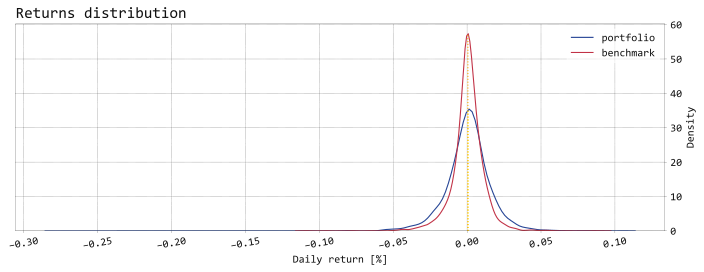

In [21]:
fig, ax = plt.subplots(figsize=(10, 4), dpi=150)
openbb.portfolio.distr(P, chart=True, external_axes=[ax])

fig.tight_layout()
f = io.BytesIO()
fig.savefig(f, format="svg")
distr_chart = f.getvalue().decode("utf-8")

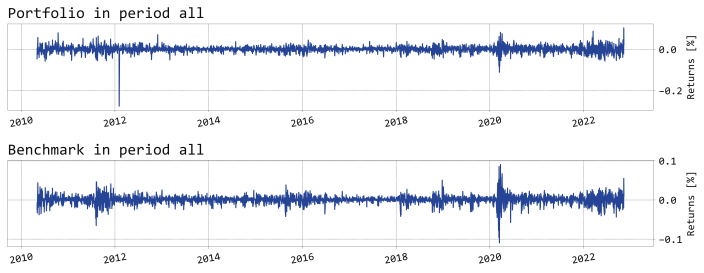

In [22]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(10, 4), dpi=150)
openbb.portfolio.dret(P, chart=True, external_axes=[ax1, ax2])

fig.tight_layout()
f = io.BytesIO()
fig.savefig(f, format="svg")
dret_chart = f.getvalue().decode("utf-8")

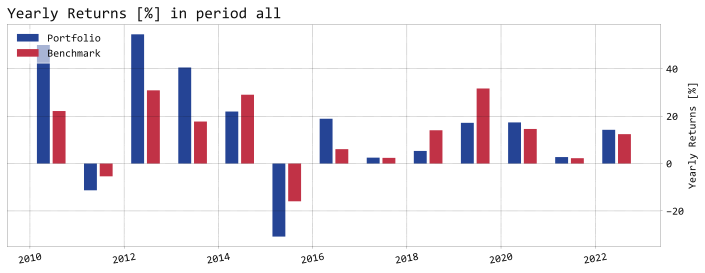

In [23]:
fig, ax = plt.subplots(figsize=(10, 4), dpi=150)
openbb.portfolio.yret(P, chart=True, external_axes=[ax])

fig.tight_layout()
f = io.BytesIO()
fig.savefig(f, format="svg")
yret_chart = f.getvalue().decode("utf-8")

## Render the report template to a file

In [25]:
body = ""

img = (
    str(REPOSITORY_DIRECTORY)
    + "/openbb_terminal/reports/templates/OpenBB_reports_logo.png"
)
floppy_disk_img = (
    str(REPOSITORY_DIRECTORY) + "/openbb_terminal/reports/templates/floppy-disc.png"
)
body += widgets.header(
    img,
    floppy_disk_img,
    "OpenBB",
    report_date,
    report_time,
    report_timezone,
    report_title,
)

body += widgets.tablinks(["SUMMARY", "In-Depth Analysis", "Statistics"])

# Summary
htmlcode = widgets.p(
    "The total performance of the portfolio versus the benchmark is as follows. "
    "Please note this calculation assumes partially shares exist for the benchmark."
)

htmlcode += widgets.row(
    [widgets.h(3, "Performance") + openbb.portfolio.perf(P).to_html()]
)

htmlcode += widgets.p("In which the following yearly returns are achieved:")

htmlcode += widgets.row([widgets.h(3, "Yearly Performance") + yret_chart])

htmlcode += widgets.p(
    "The portfolio and benchmark consists of the following allocations to countries and sectors."
)

htmlcode += widgets.row(
    [widgets.h(3, "Country Allocation") + country_allocation.to_html()]
)

htmlcode += widgets.row(
    [widgets.h(3, "Sector Allocation") + sector_allocation.to_html()]
)

htmlcode += widgets.p(
    "The portfolio consists of the following trades including returns."
)

htmlcode += widgets.row(
    [widgets.h(3, "Portfolio Trades") + P.portfolio_trades.to_html()]
)

htmlcode += widgets.p(
    "The benchmark consists of the following trades including returns."
)

htmlcode += widgets.row(
    [widgets.h(3, "Benchmark Trades") + P.benchmark_trades.to_html()]
)

body += widgets.add_tab("SUMMARY", htmlcode)

# In Depth Analysis
htmlcode = widgets.p(
    "The following metrics, Tracking Error and Information Ratio, measure whether you are "
    "closely aligned with the benchmark. If the Tracking Error is not close to 1, a different benchmark "
    "might be a better fit."
)

htmlcode += widgets.row(
    [widgets.h(3, "Tracking Error") + openbb.portfolio.metric.trackerr(P)[0].to_html()]
)
htmlcode += widgets.row(
    [widgets.h(3, "Information Ratio") + openbb.portfolio.metric.information(P).to_html()]
)

htmlcode += widgets.row([widgets.h(3, "Beta Chart") + beta_chart])

htmlcode += widgets.row(
    [widgets.h(3, "Sharpe Ratio") + openbb.portfolio.metric.sharpe(P).to_html()]
)
htmlcode += widgets.row([widgets.h(3, "Sharpe Ratio Chart") + sharpe_chart])
htmlcode += widgets.row(
    [widgets.h(3, "Volatility") + openbb.portfolio.metric.volatility(P).to_html()]
)
htmlcode += widgets.row([widgets.h(3, "Volatility Chart") + volatility_chart])
htmlcode += widgets.row(
    [widgets.h(3, "Sortino Ratio") + openbb.portfolio.metric.sortino(P).to_html()]
)
htmlcode += widgets.row([widgets.h(3, "Sortino Chart") + sortino_chart])

htmlcode += widgets.row([widgets.h(3, "Maximum Drawdown") + maxdd_chart])


body += widgets.add_tab("In-Depth Analysis", htmlcode)

# Statistics
htmlcode = widgets.row([widgets.h(3, "Distribution") + distr_chart])
htmlcode += widgets.row([widgets.h(3, "Daily Returns") + dret_chart])
htmlcode += widgets.row(
    [widgets.h(3, "Volatility") + openbb.portfolio.metric.volatility(P).to_html()]
)
htmlcode += widgets.row(
    [widgets.h(3, "Kurtosis") + openbb.portfolio.metric.kurtosis(P).to_html()]
)
htmlcode += widgets.row([widgets.h(3, "Skew") + openbb.portfolio.metric.skew(P).to_html()])
htmlcode += widgets.row(
    [widgets.h(3, "Value at Risk (VaR)") + openbb.portfolio.var(P).to_html()]
)
htmlcode += widgets.row(
    [widgets.h(3, "Expected Shortfall (cVaR)") + openbb.portfolio.es(P).to_html()]
)
htmlcode += widgets.row(
    [widgets.h(3, "Omega Ratio") + openbb.portfolio.om(P).to_html()]
)

body += widgets.add_tab("Statistics", htmlcode)

body += widgets.tab_clickable_and_save_evt()

report = widgets.html_report(title=report_name, stylesheet=stylesheet, body=body)

# to save the results
with open(report_name + ".html", "w", encoding="utf-8") as fh:
    fh.write(report)